In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/content/nearest-earth-objects(1910-2024).csv', encoding='utf-8', sep=';', on_bad_lines='skip')
data.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [43]:
data.shape

(338199, 9)

In [44]:
data.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,28
estimated_diameter_min,28
estimated_diameter_max,28
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [45]:
data.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [46]:
data.duplicated().sum()

0

In [47]:

data_cleaned = data.dropna()

print(data_cleaned.isnull().sum())


neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64


In [48]:
data.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,28
estimated_diameter_min,28
estimated_diameter_max,28
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [49]:
data['absolute_magnitude'].fillna(data['absolute_magnitude'].mean(), inplace=True)
data['estimated_diameter_min'].fillna(data['estimated_diameter_min'].mean(), inplace=True)
data['estimated_diameter_max'].fillna(data['estimated_diameter_max'].mean(), inplace=True)


<ipython-input-49-e5892a451a17>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['absolute_magnitude'].fillna(data['absolute_magnitude'].mean(), inplace=True)
<ipython-input-49-e5892a451a17>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [50]:
data.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,0
estimated_diameter_min,0
estimated_diameter_max,0
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [51]:
data.shape

(338199, 9)

In [52]:
data['is_hazardous'].value_counts()

,count
is_hazardous,
False,295037
True,43162


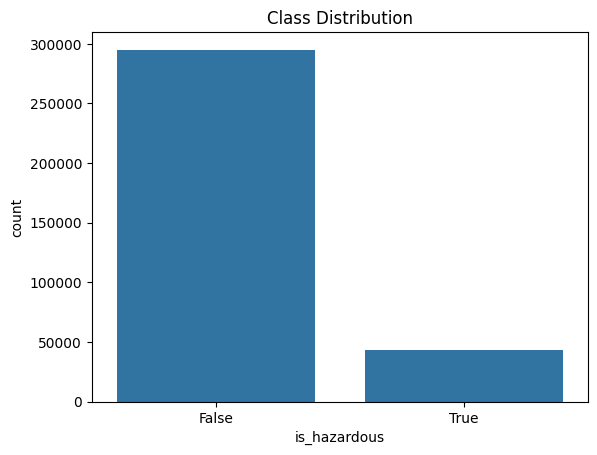

In [53]:
sns.countplot(x=data['is_hazardous'])
plt.title('Class Distribution')
plt.show()

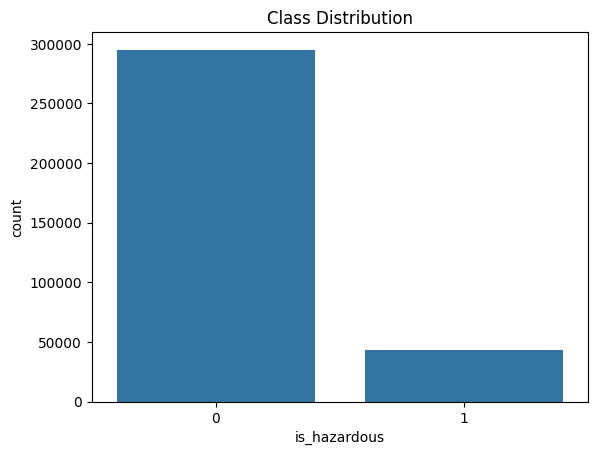

In [54]:
data['is_hazardous'] = data['is_hazardous'].astype(int)
sns.countplot(x=data['is_hazardous'])
plt.title('Class Distribution')
plt.show()

In [55]:
X = data.drop(columns=['is_hazardous'])
y = data['is_hazardous']

In [56]:
data = data.drop(columns=['neo_id', 'name', 'orbiting_body'])

In [57]:



X = data.drop(columns=['is_hazardous'])
y = data['is_hazardous']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [59]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}


for name, model in models.items():
    print(f"\nTraining {name}...")


    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


Training Logistic Regression...

Training Decision Tree...



Decision Tree Results:
Accuracy: 0.9216
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     59182
           1       0.92      0.93      0.92     58833

    accuracy                           0.92    118015
   macro avg       0.92      0.92      0.92    118015
weighted avg       0.92      0.92      0.92    118015



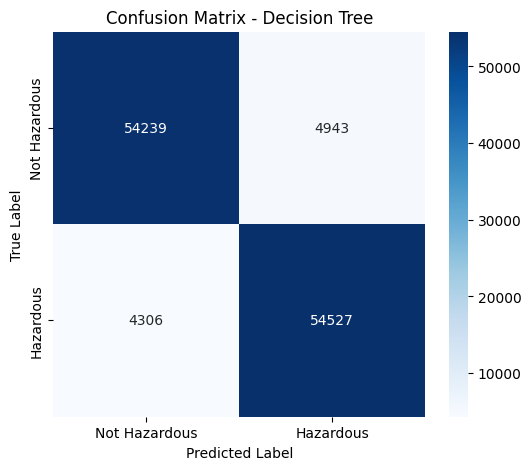

In [64]:
    accuracy = accuracy_score(y_test, y_pred)

    # Print evaluation results
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Hazardous", "Hazardous"], yticklabels=["Not Hazardous", "Hazardous"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()